<a href="https://colab.research.google.com/github/GreeshmaHarids/puthon_class/blob/main/Customer_Segmentation_Using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation with KMeans

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
df=pd.read_csv("/content/customer_segmentation (1).csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [ ]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income']=df['Income'].fillna(df['Income'].mean())

In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Education']=lab.fit_transform(df['Education'])
df['Marital_Status']=lab.fit_transform(df['Marital_Status'])


In [ ]:
#Dropping unnecessary columns
df.drop(["ID",'Year_Birth','Education','Marital_Status','Dt_Customer'],axis=1,inplace=True)

In [ ]:
x=df.iloc[:,:]
x

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,58138.0,0,0,58,635,88,546,172,88,88,...,7,0,0,0,0,0,0,3,11,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,5,0,0,0,0,0,0,3,11,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,4,0,0,0,0,0,0,3,11,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,6,0,0,0,0,0,0,3,11,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,5,0,0,0,0,0,0,3,11,0
2236,64014.0,2,1,56,406,0,30,0,0,8,...,7,0,0,0,1,0,0,3,11,0
2237,56981.0,0,0,91,908,48,217,32,12,24,...,6,0,1,0,0,0,0,3,11,0
2238,69245.0,0,1,8,428,30,214,80,30,61,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x)
  wcss.append(data.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[1403999431344.8713, 681735775599.6244, 326672769935.4358, 183218990379.6017, 124483924549.531, 82540473260.52773, 53570058190.663475, 40753876519.267845, 31141571107.13402, 24283171989.77314]


Text(0.5, 1.0, 'Elbow point evaluation')

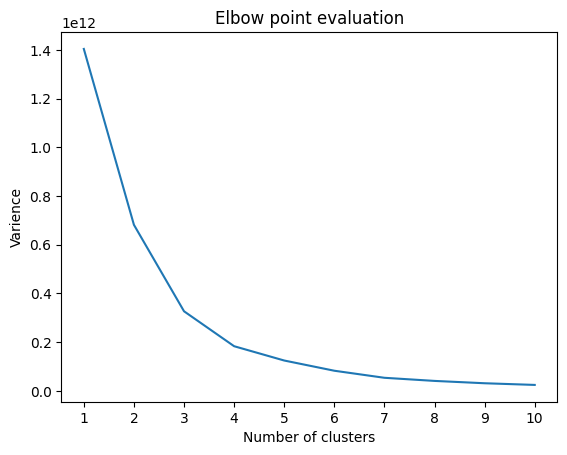

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.xlabel('Number of clusters')
plt.ylabel("Varience")
plt.title("Elbow point evaluation")

In [ ]:
#model creation
model=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_means=model.fit_predict(x)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 2, 1, 2], dtype=int32)

In [ ]:
df['Cluster']=y_means
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,3,11,1,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,3,11,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,3,11,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,3,11,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,3,11,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,0,0,3,11,0,2
2236,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,1,0,0,3,11,0,2
2237,56981.0,0,0,91,908,48,217,32,12,24,...,0,1,0,0,0,0,3,11,0,2
2238,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,0,0,0,3,11,0,1


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#now this become supervised ml
#and we can done any classification on this
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
994,64587.0,1,1,49,66,0,16,0,6,20,...,3,0,0,0,0,0,0,3,11,0
2162,47320.0,0,1,10,200,19,111,50,15,19,...,6,0,0,0,0,0,0,3,11,0
906,86429.0,0,0,10,464,28,873,29,18,37,...,2,0,0,0,1,0,0,3,11,1
572,38593.0,1,0,42,51,12,49,17,24,24,...,8,0,0,0,0,0,0,3,11,0
1877,72905.0,0,0,52,407,114,445,181,165,203,...,1,0,0,0,1,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,44078.0,1,1,17,24,1,10,2,0,4,...,5,0,0,0,0,0,0,3,11,0
1095,61825.0,0,1,56,162,50,100,55,30,27,...,4,0,0,0,0,0,0,3,11,0
1130,67381.0,0,1,67,815,8,53,11,0,70,...,7,0,1,0,0,0,0,3,11,0
1294,48918.0,1,1,21,52,0,9,0,0,1,...,4,0,0,0,0,0,0,3,11,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_percentage_error
r=RandomForestClassifier()
d=DecisionTreeClassifier()
lst=[r,d]
for i in lst:
  print("Classifier:",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  # print(y_pred)
  print("MAPE : ",mean_absolute_percentage_error(y_test,y_pred))
  print("Accuracy Score: ",accuracy_score(y_test,y_pred))
  print('\n')

Classifier: RandomForestClassifier()
MAPE :  0.06547619047619048
Accuracy Score:  0.9211309523809523


Classifier: DecisionTreeClassifier()
MAPE :  0.06770833333333333
Accuracy Score:  0.9181547619047619


